In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [12]:
from sklearn import datasets
X, y = datasets.make_blobs(
        n_samples=50, n_features=8, centers=2, cluster_std=1.05, random_state=40
    )
y = np.where(y == 0, -1, 1)
X.shape

(50, 8)

In [13]:
X

array([[-2.37965416e+00, -8.74973418e+00,  4.20397723e+00,
        -3.61164749e+00,  4.45015706e-01, -5.70962188e+00,
        -1.67295396e-02,  1.17980586e+00],
       [-9.68093229e-01, -9.10081953e+00,  5.67381136e+00,
        -3.33963413e+00, -1.87414036e+00, -3.05733575e+00,
         1.26483047e+00,  3.10452280e+00],
       [ 5.72724935e+00,  5.24173089e+00,  9.84382698e+00,
         2.32911633e+00,  8.27002160e+00,  3.74957494e+00,
        -9.19325861e+00,  7.24976663e+00],
       [ 4.06882459e+00,  6.35854917e+00,  1.04405013e+01,
         7.53200725e-01,  4.55472543e+00,  3.00686593e+00,
        -8.42218330e+00,  8.52712013e+00],
       [-1.81294631e+00, -7.55640734e+00,  6.89571784e+00,
        -3.81728739e+00,  6.35224932e-01, -4.24870176e+00,
        -9.20211417e-01,  3.91622348e+00],
       [ 2.80892077e-03, -7.84209340e+00,  3.54475478e+00,
        -2.25032946e+00, -2.09809021e+00, -3.83636464e+00,
         1.52242730e+00,  1.91584168e+00],
       [-2.28022731e+00, -8.649540

In [7]:
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [14]:
model=SVM()
model.fit(X, y)
print(model.w, model.b)

[ 0.03128145  0.0864297  -0.00784229  0.04889619  0.02201526  0.0466106
 -0.04386406  0.01749552] 0.009000000000000001


In [15]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
        x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()


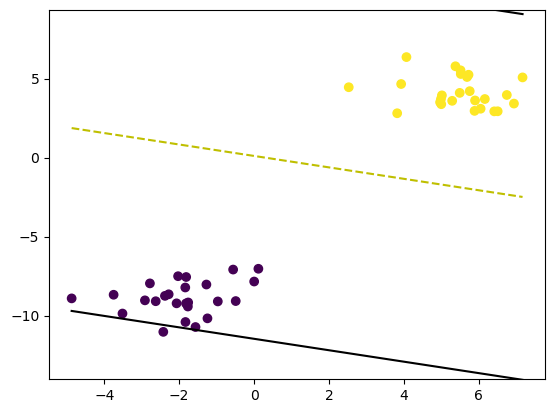

In [16]:
visualize_svm()